# XGBoost


## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 6)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning:

0.23ubuntu1 is an invalid version and will not be supported in a future release

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning:

0.1.36ubuntu1 is an invalid version and will not be supported in a future release



In [3]:
print('pandas', pd.__version__)
print('xgboost', xgboost.__version__)

pandas 1.3.5
xgboost 1.5.1


## Data

In [4]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-01-25 20:43:38--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 54.239.143.49, 54.239.143.31, 54.239.143.129, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|54.239.143.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99274 (97K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>]  96.95K  --.-KB/s    in 0.04s   

2022-01-25 20:43:38 (2.69 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [99274/99274]



In [5]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(740, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,46016,1437,227,22,195,41,56,105,477,443,...,260,62,2225,256,474,710,304,329,303,1309
2022-01-21,49724,1644,183,33,217,55,74,118,595,350,...,260,107,2668,293,485,644,287,339,288,1236
2022-01-22,54430,1605,277,35,253,87,85,119,639,492,...,309,99,2833,281,493,773,332,319,370,1313
2022-01-23,49847,1591,145,48,285,72,60,150,693,498,...,203,70,2646,153,432,687,319,318,407,956
2022-01-24,44692,1589,77,61,192,153,123,150,649,422,...,160,58,2013,299,360,516,253,204,274,611


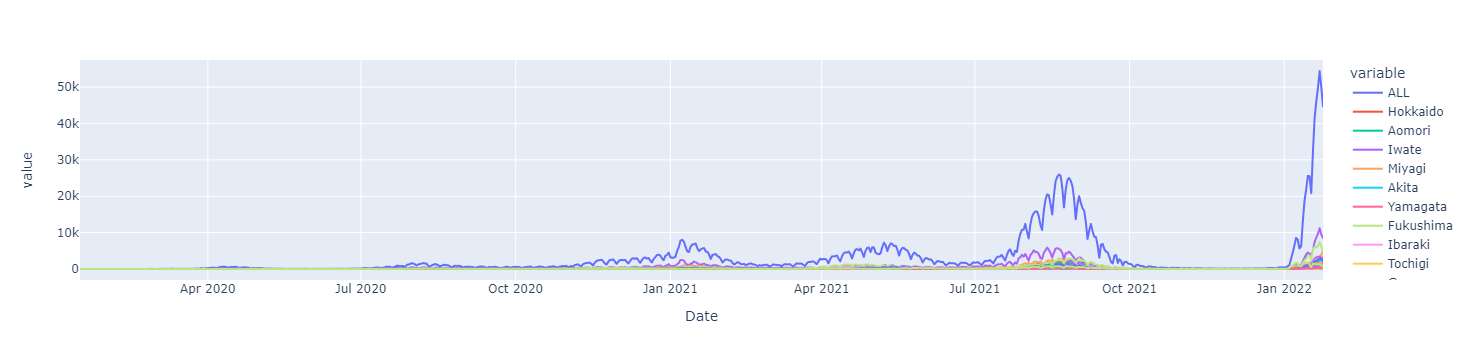

In [6]:
px.line(df, )

In [7]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(106, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-26,223.714286,20.714286,0.000000,0.000000,0.285714,0.000000,0.142857,2.714286,1.428571,5.285714,...,0.000000,0.000000,10.857143,0.428571,0.857143,0.142857,0.000000,0.000000,1.428571,18.000000
2022-01-02,383.285714,20.857143,0.000000,0.857143,0.714286,0.000000,0.142857,2.285714,1.714286,12.285714,...,0.000000,0.142857,7.142857,0.857143,0.428571,0.000000,0.000000,0.000000,0.714286,36.142857
2022-01-09,4603.428571,72.857143,5.428571,5.142857,11.142857,0.428571,4.857143,15.428571,41.428571,38.142857,...,16.142857,3.714286,106.857143,21.857143,19.857143,19.428571,10.571429,7.714286,38.857143,953.428571
2022-01-16,16657.571429,369.857143,82.000000,12.285714,61.000000,22.714286,28.000000,43.571429,164.571429,148.571429,...,134.857143,19.142857,662.857143,113.428571,129.142857,271.285714,75.142857,76.857143,118.571429,1381.142857
2022-01-23,42046.571429,1255.428571,187.571429,26.571429,183.857143,53.285714,58.857143,98.571429,481.571429,372.857143,...,232.428571,70.142857,2124.000000,221.000000,393.571429,642.714286,257.428571,256.142857,283.428571,1174.285714


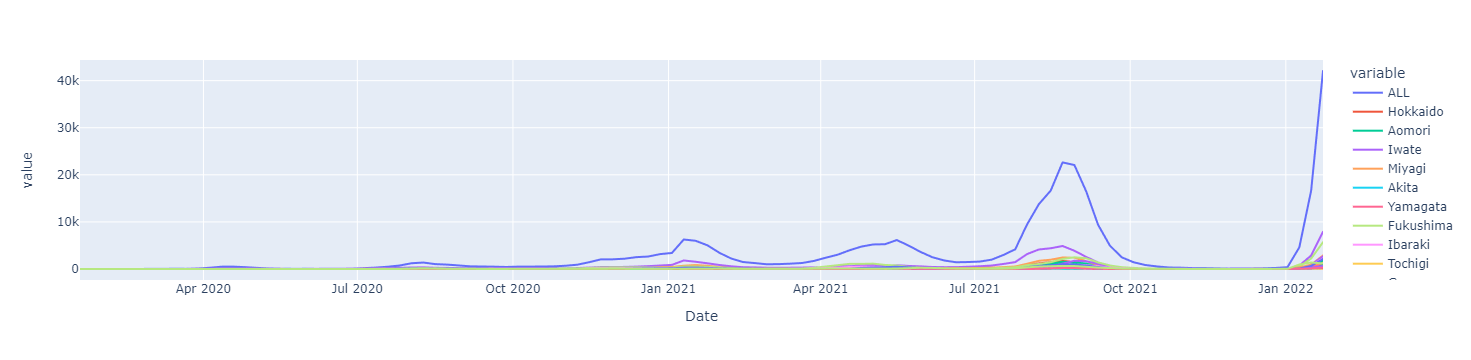

In [8]:
px.line(df_gr,)

### Scale

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
ts_all = df_gr.ALL
ts_all_sc = sc.fit_transform(ts_all.values.reshape(-1, 1)).ravel()
ts_all_sc = pd.Series(ts_all_sc, index=ts_all.index)
ts_all_sc.head(1)

Date
2020-01-19    0.0
Freq: W-SUN, dtype: float64

### FE

In [10]:
forecast_weeks = 12
# df_fe = df_gr.ALL.to_frame()
df_fe = ts_all_sc.to_frame(name='ALL')

# add new rows for forecast
index_list = pd.date_range(ts_all_sc.index[-1]+relativedelta(weeks=1), ts_all_sc.index[-1]+relativedelta(weeks=forecast_weeks), freq='W')
df_fe = pd.concat([df_fe, pd.DataFrame(index=index_list)])

# shift
for i in range(forecast_weeks, forecast_weeks+12):
    df_fe[f'ALL_{i}_week_ago'] = df_fe.ALL.shift(i)
# df_fe[f'ALL_12_week_ago'] = df_fe.ALL.shift(12)
df_fe['year'] = df_fe.index.year
df_fe['month'] = df_fe.index.month
df_fe['weekofyear'] = df_fe.index.isocalendar().week
df_fe = df_fe.astype('float')
df_fe = df_fe.loc[df_fe.ALL_23_week_ago.dropna().index, :]
df_fe

,ALL,ALL_12_week_ago,ALL_13_week_ago,ALL_14_week_ago,ALL_15_week_ago,ALL_16_week_ago,ALL_17_week_ago,ALL_18_week_ago,ALL_19_week_ago,ALL_20_week_ago,ALL_21_week_ago,ALL_22_week_ago,ALL_23_week_ago,year,month,weekofyear
2020-06-28,0.001893,0.006480,0.002654,0.000915,0.001078,0.000796,0.000375,0.000256,0.000045,0.000004,0.000021,0.000004,0.000000,2020.0,6.0,26.0
2020-07-05,0.004319,0.011814,0.006480,0.002654,0.000915,0.001078,0.000796,0.000375,0.000256,0.000045,0.000004,0.000021,0.000004,2020.0,7.0,27.0
2020-07-12,0.007177,0.011780,0.011814,0.006480,0.002654,0.000915,0.001078,0.000796,0.000375,0.000256,0.000045,0.000004,0.000021,2020.0,7.0,28.0
2020-07-19,0.011451,0.009028,0.011780,0.011814,0.006480,0.002654,0.000915,0.001078,0.000796,0.000375,0.000256,0.000045,0.000004,2020.0,7.0,29.0
2020-07-26,0.017583,0.005583,0.009028,0.011780,0.011814,0.006480,0.002654,0.000915,0.001078,0.000796,0.000375,0.000256,0.000045,2020.0,7.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-20,NaN,0.005315,0.003521,0.002726,0.002658,0.002135,0.003222,0.004265,0.004560,0.006606,0.007520,0.012840,0.019972,2022.0,3.0,11.0
2022-03-27,NaN,0.009110,0.005315,0.003521,0.002726,0.002658,0.002135,0.003222,0.004265,0.004560,0.006606,0.007520,0.012840,2022.0,3.0,12.0
2022-04-03,NaN,0.109479,0.009110,0.005315,0.003521,0.002726,0.002658,0.002135,0.003222,0.004265,0.004560,0.006606,0.007520,2022.0,4.0,13.0
2022-04-10,NaN,0.396166,0.109479,0.009110,0.005315,0.003521,0.002726,0.002658,0.002135,0.003222,0.004265,0.004560,0.006606,2022.0,4.0,14.0


### split

In [11]:
X = df_fe.drop('ALL', axis=1)
y = df_fe.ALL
print(X.shape, y.shape)

(95, 15) (95,)


## functions

In [12]:
def trainXGBoost(X_train, y_train):    
    # val
    X_val = X_train[X_train.index == X_train.index[-1]]
    X_train = X_train.drop(X_train.index[-1])
    y_val = y_train[y_train.index == y_train.index[-1]]
    y_train = y_train.drop(y_train.index[-1])
    
    params = {'n_estimators': 1000, 'random_state': 42, 'objective': 'reg:squarederror', 'booster': 'gblinear'}
    
    model = xgboost.XGBRegressor(**params)
    model.fit(
        X_train, y_train, verbose=0,
        eval_set=[(X_val, y_val)], eval_metric='rmse', early_stopping_rounds=10,
    )

    return model

## forecast

(80, 15) (80,)
CPU times: user 539 ms, sys: 10.5 ms, total: 549 ms
Wall time: 103 ms


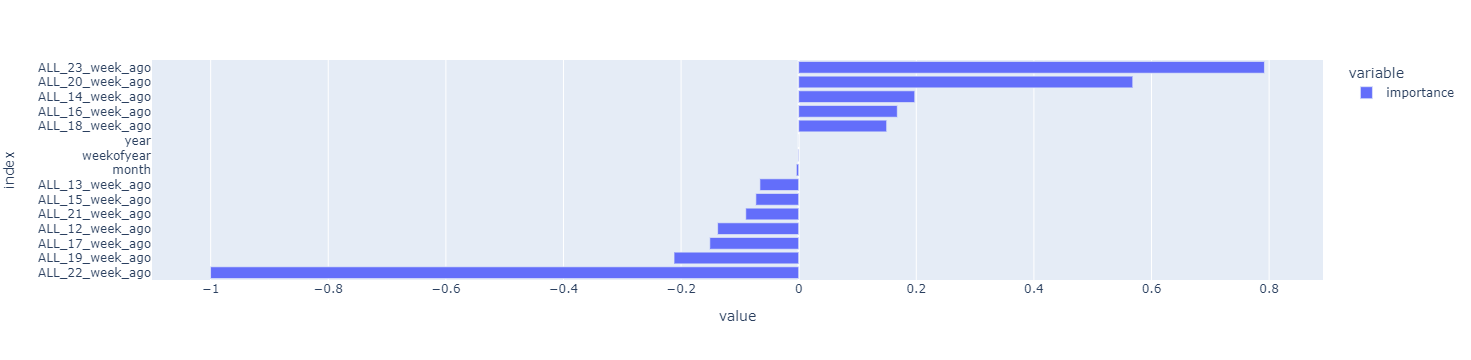

In [13]:
%%time

train_last_date = '2022-01-02'
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
print(X_train.shape, y_train.shape)

model = trainXGBoost(X_train, y_train)

fi = pd.DataFrame(model.coef_, index=X_train.columns, columns=['importance']).sort_values('importance')
px.bar(fi, orientation='h')

RMSE: 4449.1


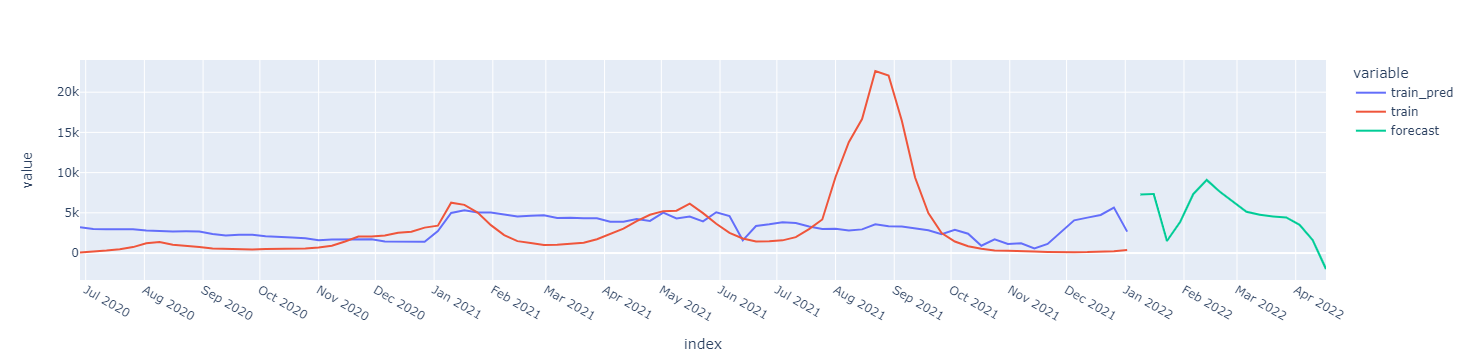

In [14]:
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
y_train_index = y_train.index

y_train_pred = model.predict(X_train)
y_train_pred = sc.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_pred = pd.Series(y_train_pred, index=y_train_index, name='train_pred')
y_train = sc.inverse_transform(y_train.values.reshape(-1, 1)).ravel()
y_train = pd.Series(y_train, index=y_train_index, name='train')

rmse = np.sqrt( mean_squared_error(y_train, y_train_pred) )
print('RMSE: {:.5}'.format(rmse))

X_forecast = X[X.index > train_last_date]
y_forecast = y[y.index > train_last_date]
y_forecast_index = y_forecast.index

y_forecast = model.predict(X_forecast)
y_forecast = sc.inverse_transform(y_forecast.reshape(-1, 1)).ravel()
y_forecast = pd.Series(y_forecast, index=y_forecast_index, name='forecast')

fig = px.line(pd.concat([y_train_pred, y_train, y_forecast], axis=1))
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()